# Text by the Numbers: Text Analysis across Multiple Texts

**A Reproducible Research Workshop**

(A Collaboration between Dartmouth Library and Research Computing)

[*Click here to view or register for our current list of workshops*](http://dartgo.org/RRADworkshops)

*This notebook created by*:
+ Version 1.0: Jeremy Mikecz, Research Data Services (Dartmouth Library)
+ Version 2.0: ???
<!--
+ Some of the inspiration for the code and information in this notebook was taken from https://www.w3schools.com/python/python_intro.asp -- This is a great resource if you want to learn more about Python!-->

**How can we use computational techniques to analyze texts and then visualize patterns buried within them?** 

**What can we learn about texts by applying text analysis in Python? How do we get started?**

This is **Notebook 2** of 2 for the **Text by the Numbers: Text Analysis Methods in Python** workshop:
+ Notebook 1: Text by the Numbers: Working with Texts one text
+ Notebook 2: Text by the Numbers 2: Text Analysis across Multiple Texts

In this session, participants will:

+ Learn how to write basic scripts in Python using Jupyter Notebooks
+ import and pre-process documents (into lists of words or tokens, lower-case each word, remove "stopwords", etc.)
+ analyze each document using word frequencies, collocations, ngram frequencies, etc.

**Table of Contents**

+ I. Setup
+ 

## Part I: Setup

1. Before beginning, we need to import some packages.

In [3]:
import pathlib
from pathlib import Path
import glob 

textdir = Path("~/shared/RR-workshop-data/state-of-the-union-dataset/txt").expanduser() 
pathlist = sorted(textdir.glob('*.txt')) 

<div class="alert alert-info" role="alert">
    <p style="color:blue"><b>Exercises</b>:</p> 
    <p style="color:blue">2. Choose a corpus you would like to analyze further. Save a Path to this corpus. You can see if it worked correctly by running: `[path.name for path in pathlist]`
</div>

## II. Create a Dataframe of processed texts

**3. DATAFRAMES:** To enable easier analysis of a corpus of texts, we can store info about each in a **dataframe**. A dataframe in Python is a common data structure enabled with the **pandas** library. It is a two-dimensional data table that stores data in rows and columns. 

Run the code below, and then examine what each portion of the code does (see the "#comments").

In [4]:
import pandas as pd   
import nltk
from nltk import RegexpTokenizer  
from nltk.corpus import stopwords
stop = sorted(stopwords.words('english'))

In [5]:
tokenizer = RegexpTokenizer(r'\w+')
#n=50

txtList=[]
pathlist = sorted(textdir.glob('*.txt'))      # .glob only stores the pathlist temporarily (for some reason), so you need to call it again!2
for path in pathlist:
    fn=path.stem                       #stem returns the filename minus the ".txt" (file extension). 
    pres,year=fn.split("_")            # fn = "1794_Washington" becomes year = "1794" and pres = "Washington"
    with open(path,'r') as f:  
        text1 = f.read()                #opens each file and reads it in as "sotu"
    tokens=tokenizer.tokenize(text1)    # tokenizes "sotu"
    numtoks = len(tokens)             # counts the number of tokens in "sotu"
    ltokens_ns = [tok.lower() for tok in tokens if tok not in stop]
    txtList.append([pres, year, numtoks, tokens, ltokens_ns, text1])   #add this info for "sotu" to a running list for all sotu addresses
       

4. We have thus stored information about each text into a list call `txtList`. Now we want to read in this list of information into a dataframe.

In [6]:
colnames=['pres','year','numtoks','tokens', 'ltoks_ns', 'fulltext']
textdf=pd.DataFrame(txtList, columns=colnames)  #places our completed list of SOTU info in a dataframe
textdf.head(10)                                #prints out the first 10 rows of this dataframe (the default value for head() is 5 rows)

,pres,year,numtoks,tokens,ltoks_ns,fulltext
0,Adams,1797,2060,"[Gentlemen, of, the, Senate, and, Gentlemen, o...","[gentlemen, senate, gentlemen, house, represen...",Gentlemen of the Senate and Gentlemen of the H...
1,Adams,1798,2218,"[Gentlemen, of, the, Senate, and, Gentlemen, o...","[gentlemen, senate, gentlemen, house, represen...",Gentlemen of the Senate and Gentlemen of the H...
2,Adams,1799,1505,"[Gentlemen, of, the, Senate, and, Gentlemen, o...","[gentlemen, senate, gentlemen, house, represen...",Gentlemen of the Senate and Gentlemen of the H...
3,Adams,1800,1374,"[Gentlemen, of, the, Senate, and, Gentlemen, o...","[gentlemen, senate, gentlemen, house, represen...",Gentlemen of the Senate and Gentlemen of the H...
4,Adams,1825,9091,"[Fellow, Citizens, of, the, Senate, and, of, t...","[fellow, citizens, senate, house, representati...",Fellow Citizens of the Senate and of the House...
5,Adams,1826,7852,"[Fellow, Citizens, of, the, Senate, and, of, t...","[fellow, citizens, senate, house, representati...",Fellow Citizens of the Senate and of the House...
6,Adams,1827,7064,"[Fellow, Citizens, of, the, Senate, and, of, t...","[fellow, citizens, senate, house, representati...",Fellow Citizens of the Senate and of the House...
7,Adams,1828,7398,"[Fellow, Citizens, of, the, Senate, and, of, t...","[fellow, citizens, senate, house, representati...",Fellow Citizens of the Senate and of the House...
8,Arthur,1881,3903,"[To, the, Senate, and, House, of, Representati...","[to, senate, house, representatives, united, s...",To the Senate and House of Representatives of ...
9,Arthur,1882,3157,"[To, the, Senate, and, House, of, Representati...","[to, senate, house, representatives, united, s...",To the Senate and House of Representatives of ...


<div class="alert alert-info" role="alert">
    <p style="color:blue"><b>Exercises</b>:</p> 
    <p style="color:blue">5. Using your chosen corpus:</p>
    <ol style="color:blue"> 
        <li>read it</li> 
        <li>lower-case it</li> 
        <li>remove all stopwords</li>
        <li>count the number of tokens</li>
        <li>and read this information into a dataframe</li>
    </ol>
</div>

# [Basic Seaborn Viz: bar chart - word length by year]

<Axes: xlabel='year', ylabel='numtoks'>

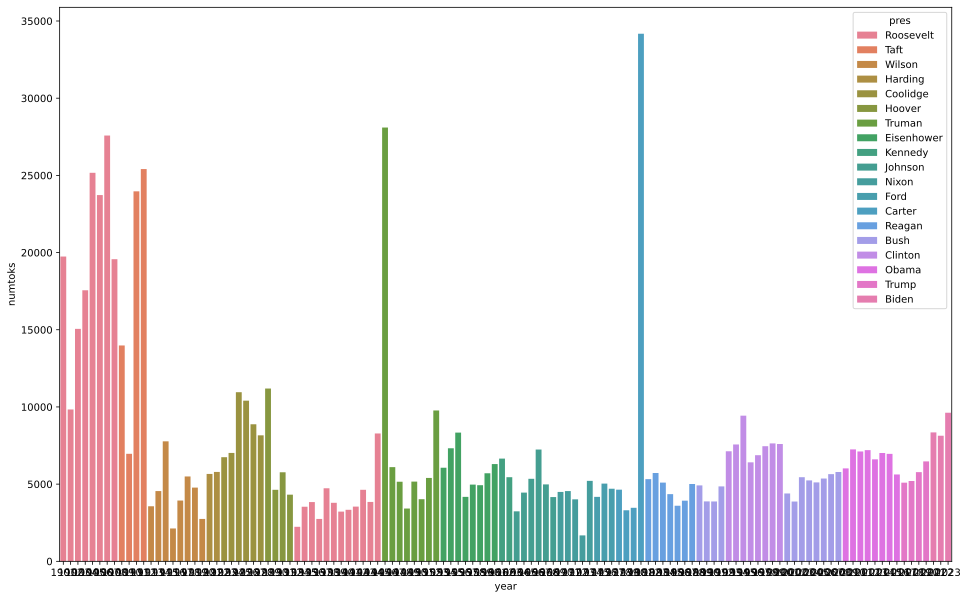

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [16, 10]  #changes default figure size to make larger plots
%config InteractiveShellApp.matplotlib = 'inline'
%config InlineBackend.figure_formats = ['svg']

textdf['year'] = textdf['year'].astype(int)
subdf = textdf[textdf['year'] > 1900]

sns.barplot(subdf, x = "year", y = "numtoks", hue = "pres")

In [ ]:
sotudf = sotudf.sort_values(by = "year")
sotudf.head()

In [ ]:
sotudf["presnum"] = (sotudf["pres"] != sotudf["pres"].shift()).cumsum()
sotudf.tail(10)

In [ ]:
sotudf2 = sotudf.groupby(['presnum']).agg({'pres':'first','wordfreq':'sum','numtoks':'sum','year':'first'})
sotudf2['freq_perMillion'] = sotudf2['wordfreq'] / sotudf2['numtoks'] * 1000000

In [ ]:
g=sns.barplot(data=sotudf2, x="year", y="freq_perMillion")
g.tick_params(labelrotation=90)
g.set(title = "Frequency of '%s' in State of the Union Addresses"%searchTerm)
g.set(ylabel='per million words', xlabel='President')
g.set(xticklabels = sotudf2.pres); #adding the ";" removes the annoying text that Python sometimes prints out with a graphic#

# Term Frequency - Inverse Data Frequency (TFIDF)

<img src = "https://miro.medium.com/max/720/1*qQgnyPLDIkUmeZKN2_ZWbQ.webp" style="width:60%">

Image from Yassine Hamdaoui, ["TF(Term Frequency)-IDF(Inverse Document Frequency) from scratch in python"](https://towardsdatascience.com/tf-term-frequency-idf-inverse-document-frequency-from-scratch-in-python-6c2b61b78558) *Towards Data Science (Medium)* (Dec. 9, 2019).

## TF-IDF with Scikit-Learn [MW]

Tf-idf is a method that tries to identify the most distinctively frequent or significant words in a document. 

In this lesson, we’re going to learn how to calculate tf-idf scores using a collection of plain text (.txt) files and the Python library scikit-learn, which has a quick and nifty module called TfidfVectorizer.

In this lesson, we will cover how to:

    Calculate and normalize tf-idf scores for U.S. Inaugural Addresses with scikit-learn


## Breaking Down the TF-IDF Formula [MW]

But first, let’s quickly discuss the tf-idf formula. The idea is pretty simple.

**tf-idf = term_frequency * inverse_document_frequency**

**term_frequency** = number of times a given term appears in document

**inverse_document_frequency** = log(total number of documents / number of documents with term) + 1*****

You take the number of times a term occurs in a document (term frequency). Then you take the number of documents in which the same term occurs at least once divided by the total number of documents (document frequency), and you flip that fraction on its head (inverse document frequency). Then you multiply the two numbers together (term_frequency * inverse_document_frequency).

The reason we take the inverse, or flipped fraction, of document frequency is to boost the rarer words that occur in relatively few documents. Think about the inverse document frequency for the word “said” vs the word “pigeon.” The term “said” appears in 13 (document frequency) of 24 (total documents) Lost in the City stories (24 / 13 –> a smaller inverse document frequency) while the term “pigeons” only occurs in 2 (document frequency) of the 24 stories (total documents) (24 / 2 –> a bigger inverse document frequency, a bigger tf-idf boost).

*There are a bunch of slightly different ways that you can calculate inverse document frequency. The version of idf that we’re going to use is the scikit-learn default, which uses “smoothing” aka it adds a “1” to the numerator and denominator:

**inverse_document_frequency** = log((1 + total_number_of_documents) / (number_of_documents_with_term +1)) + 1

## Part II. Calculate tf-idf [MW]

To calculate tf–idf scores for every word, we’re going to use scikit-learn’s TfidfVectorizer.

4. When you initialize TfidfVectorizer, you can choose to set it with different parameters. These parameters will change the way you calculate tf–idf.

The recommended way to run TfidfVectorizer is with smoothing (smooth_idf = True) and normalization (norm='l2') turned on. These parameters will better account for differences in text length, and overall produce more meaningful tf–idf scores. Smoothing and L2 normalization are actually the default settings for TfidfVectorizer, so to turn them on, you don’t need to include any extra code at all.

Initialize TfidfVectorizer with desired parameters (default smoothing and normalization)

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(input='filename', stop_words='english')

5. Run TfidfVectorizer on our text_files

In [9]:
tfidf_vector = tfidf_vectorizer.fit_transform(pathlist)
tfidf_vector


<233x25023 sparse matrix of type '<class 'numpy.float64'>'
	with 361183 stored elements in Compressed Sparse Row format>

6. Make a DataFrame out of the resulting tf–idf vector, setting the “feature names” or words as columns and the titles as rows

In [10]:
text_titles = [path.stem for path in pathlist]
#TfidfVectorizer returns a sparse matrix and that's why we have to call .toarray()  before proceeding.
tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=text_titles, columns=tfidf_vectorizer.get_feature_names_out())
#warning: get_feature_names will be depreciated; use get_feature_names_out instead
   ##I made this fix in the code above
print(tfidf_df)

              00       000  0000  0001  001  002  003  004  005  006  ...  \
Adams_1797   0.0  0.000000   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Adams_1798   0.0  0.000000   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Adams_1799   0.0  0.000000   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Adams_1800   0.0  0.000000   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Adams_1825   0.0  0.271497   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
...          ...       ...   ...   ...  ...  ...  ...  ...  ...  ...  ...   
Wilson_1916  0.0  0.000000   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Wilson_1917  0.0  0.000000   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Wilson_1918  0.0  0.000000   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Wilson_1919  0.0  0.023909   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
Wilson_1920  0.0  0.204717   0.0   0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

             zimbabwe  zimbabwean  zinc  zion  zollverein  zone  zones  \
A

In [11]:
tfidf_df.head()

,00,000,0000,0001,001,002,003,004,005,006,...,zimbabwe,zimbabwean,zinc,zion,zollverein,zone,zones,zoological,zooming,zuloaga
Adams_1797,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adams_1798,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adams_1799,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adams_1800,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Adams_1825,0.0,0.271497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
tfidf_df['yr'] = tfidf_df.index.str[-4:].astype(int)
tfidf_df['pres'] = tfidf_df.index.str[:-5]
tfidf_df.head()

,00,000,0000,0001,001,002,003,004,005,006,...,zinc,zion,zollverein,zone,zones,zoological,zooming,zuloaga,yr,pres
Adams_1797,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1797,Adams
Adams_1798,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1798,Adams
Adams_1799,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1799,Adams
Adams_1800,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1800,Adams
Adams_1825,0.0,0.271497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1825,Adams


In [13]:
tfidf_21C = tfidf_df.loc[(tfidf_df['yr'] > 1999),: ]
tfidf_21C.shape

(24, 25025)

In [14]:
#make it a long df
tfidf_21C_metadata = tfidf_21C[["pres", "yr"]]
tfidf_21C_values = tfidf_21C.drop(columns = ["pres", "yr"])
tfidf_21C_values.index.name = "textname"
tfidf_21C_values = tfidf_21C_values.reset_index()
tfidf_21C_values.head()


,textname,00,000,0000,0001,001,002,003,004,005,...,zimbabwe,zimbabwean,zinc,zion,zollverein,zone,zones,zoological,zooming,zuloaga
0,Biden_2021,0.0,0.038645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.020148,0.0,0.0,0.0,0.0
1,Biden_2022,0.0,0.035820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
2,Biden_2023,0.0,0.070490,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,Bush_2001,0.0,0.026712,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,Bush_2002,0.0,0.020724,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [15]:
#list(tfidf_21C.columns)

In [16]:
tfidf_long =  pd.melt(tfidf_21C_values, id_vars = "textname", var_name = "word", value_name = "tfidf_score", value_vars = list(tfidf_21C_values.drop(columns = ["textname"]).columns))

In [17]:
tfidf_long.head(15)

,textname,word,tfidf_score
0,Biden_2021,00,0.0
1,Biden_2022,00,0.0
2,Biden_2023,00,0.0
3,Bush_2001,00,0.0
4,Bush_2002,00,0.0
5,Bush_2003,00,0.0
6,Bush_2004,00,0.0
7,Bush_2005,00,0.0
8,Bush_2006,00,0.0
9,Bush_2007,00,0.0


In [18]:
textnames = list(tfidf_long['textname'].unique())

In [19]:
""" for text in textnames:
    dfsub = tfidf_long.loc[tfidf_long['textname'] == text,:]
    dfsub = dfsub.sort_values(by = "tfidf_score", ascending = False).iloc[:15,]
    #print(dfsub.head())
    sns.barplot(dfsub, x = "tfidf_score", y = "word") """

' for text in textnames:\n    dfsub = tfidf_long.loc[tfidf_long[\'textname\'] == text,:]\n    dfsub = dfsub.sort_values(by = "tfidf_score", ascending = False).iloc[:15,]\n    #print(dfsub.head())\n    sns.barplot(dfsub, x = "tfidf_score", y = "word") '

In [20]:
#get top 15 tfidf scores for each text
N = 15
tfidf_long = tfidf_long.sort_values(by = "tfidf_score", ascending=False)
print(tfidf_long.shape)
tfidf_sub = tfidf_long.groupby('textname').head(N).reset_index(drop=True)
#textlist = sorted(list(set(tfidf_sub['textname'])))

(600552, 3)


In [21]:
for i, text in enumerate(textnames):
    onetext_df = tfidf_sub[tfidf_sub['textname'] == text]
    print(onetext_df.head(10))

       textname       word  tfidf_score
2    Biden_2021       jobs     0.295617
27   Biden_2021    america     0.214516
31   Biden_2021         ve     0.204382
54   Biden_2021   american     0.172958
77   Biden_2021  americans     0.155705
85   Biden_2021    percent     0.151093
108  Biden_2021      going     0.141611
142  Biden_2021       know     0.130912
159  Biden_2021   pandemic     0.127364
187  Biden_2021     people     0.122462
       textname       word  tfidf_score
13   Biden_2022         ve     0.250057
18   Biden_2022         ll     0.242317
37   Biden_2022      folks     0.193564
57   Biden_2022      covid     0.171086
67   Biden_2022      putin     0.163555
74   Biden_2022    tonight     0.157195
81   Biden_2022    america     0.152673
92   Biden_2022  americans     0.149130
125  Biden_2022  ukrainian     0.135597
133  Biden_2022      thank     0.132799
       textname     word  tfidf_score
15   Biden_2023    folks     0.248215
19   Biden_2023    going     0.235750
43   B

As you can see, these results present some problems. 
+ First, there are some tokens that aren't even words like "ve" and "ll". Thus, the tokenizer is splitting "we've" and "I'll" into separate parts but not associating them correctly with the words "have" and "will".
+ Second, we see multiple variations of the same root word, like "american" and "americans" ("america", of course, may or may not be considered a separate concept depending on how you view it).
+ Third, some of the words that appear uniquely often in a given SOTU address (and therefore have high tfidf scores) don't reveal much interesting about the content of the speech. In recent decades, Presidents have developed the somewhat annoying habit of inviting special guests and telling their stories. Thus, some of the first names that suddenly appear in some of these lists are invited guests.

More importantly, we wouldn't want to over-interpret these results. Rather, they should pose new questions for us and provoke us to engage in some close reading to better understand some patterns that may not have obvious answer on first glance. For more words of caution about such lists see: Matthew Lavin's comments about [interpreting word lists on the *Programming Historian*](https://programminghistorian.org/en/lessons/analyzing-documents-with-tfidf#interpreting-word-lists-best-practices-and-cautionary-notes).

As for the three issues raised above, we can most easily address the second issue. We can first combine all the code above into one function that reads in a path and returns a long dataframe of tfidf scores.

Let's first run this code to save the function into memory. But,this time, we are going to insert a tokenizer that also lemmatizes each token, thus:

```
americans --> american
sang / sung --> sing
geese --> goose
```

We must also remember that we are removing stopwords from our list of tokens. Thus, before removing stopwords, we should lemmatize our stopword list.

# [examples]

To figure out how to do this, I searched online for "scikit-learn TfidfVectorizer lemmas." The [third result](https://gist.github.com/4OH4/f727af7dfc0e6bb0f26d2ea41d89ee55) from github user "4OH4" returned some code that made some sense to me. 

The code below, thus, is copied and pasted from above with the exception of the lines that we added (using 4OH4's code, indicated by "###") or was modified (indicated by "#$$$$").


In [57]:
#

from nltk.stem import WordNetLemmatizer   ###

# Interface lemma tokenizer from nltk with sklearn
class LemmaTokenizer:                                               ###
    ignore_tokens = [',', '.', ';', ':', '"', '``', "''", '`']      ###
    def __init__(self):                                             ###
        self.wnl = WordNetLemmatizer()                              ###
    def __call__(self, doc):                                        ###
        #return [self.wnl.lemmatize(t) for t in word_tokenize(doc) if t not in self.ignore_tokens]
        return [self.wnl.lemmatize(t) for t in tokenizer.tokenize(doc) if t not in self.ignore_tokens]    ###
    
lemma_tokenizer = LemmaTokenizer()                                 ###
eng_stops = set(stopwords.words('english'))                        ###
lemma_stop = lemma_tokenizer(' '.join(eng_stops))                  ###

def tfidf_analysis(textdir, ng_range = (1,1)):
    '''
    textdir = pathlib Path object to folder containing .txt files to be analyzed
    ng_range = range of ngrams to be analyzed, i.e. (1,2) will analyze words of length 1 (unigrams) and 2 (bigrams) 
    reads in a file folder and returns a long tfidf dataframe for all .txt files found in this folder
    Steps:
    1. 
    '''
    #tfidf_vectorizer = TfidfVectorizer(input='filename', stop_words='english', ngram_range = (ng_range))
    tfidf_vectorizer = TfidfVectorizer(input = "filename", stop_words = lemma_stop, tokenizer = lemma_tokenizer, ngram_range = (ng_range))  #$$$$
    pathlist = sorted(textdir.glob('*.txt'))
    tfidf_vector = tfidf_vectorizer.fit_transform(pathlist)
    text_titles = [path.stem for path in pathlist]
    tfidf_df = pd.DataFrame(tfidf_vector.toarray(), index=text_titles, columns=tfidf_vectorizer.get_feature_names_out())
    print("df shape: ", tfidf_df.shape)
    tfidf_df = tfidf_df.loc[: ,(tfidf_df.max(numeric_only = True) > 0.02)]
    print("df shape: ", tfidf_df.shape)
    #print(tfidf_df.head())
    tfidf_df.index.name = "textname"
    tfidf_df = tfidf_df.reset_index()
    tfidf_long =  pd.melt(tfidf_df, id_vars = "textname", var_name = "word", value_name = "tfidf_score", value_vars = list(tfidf_df.drop(columns = ["textname"]).columns))
    
    tfidf_long = tfidf_long.sort_values(by = 'tfidf_score', ascending = False)
    print("df shape: ", tfidf_long.shape)
    print(tfidf_long.head(10))
    return(tfidf_long)

In [58]:
longdf = tfidf_analysis(textdir, (1,1))
print(longdf.shape)
longdf.head()

c:\Users\F0040RP\Documents\DartLib_RDS\intro-to-python\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


df shape:  (233, 21964)
df shape:  (233, 16780)
df shape:  (3909740, 3)
               textname     word  tfidf_score
431           Taft_1910       00     0.634049
3780777    Johnson_1966  vietnam     0.505662
3284172     Carter_1980   soviet     0.474626
3328802     Pierce_1855    state     0.462885
1671121  Cleveland_1895     gold     0.455449
243         Arthur_1883       00     0.452613
3328751    Johnson_1865    state     0.448597
242         Arthur_1882       00     0.447015
2284965       Polk_1846   mexico     0.421521
3328803     Pierce_1856    state     0.398551
(3909740, 3)


,textname,word,tfidf_score
431,Taft_1910,00,0.634049
3780777,Johnson_1966,vietnam,0.505662
3284172,Carter_1980,soviet,0.474626
3328802,Pierce_1855,state,0.462885
1671121,Cleveland_1895,gold,0.455449


Using the **.shape()** method to examine the dimensions of the dataset both before and after lemmatizations shows that the long tfidf dataframe has been reduced from 5.8 million rows to 5.1 million rows, suggesting it worked.

We can copy and paste the code from XXX?? to the cell below to extract the 15 highest tfidf scores for each speech. First, however, we need to change the name of the dataframe from `tfidf_long` to `longdf`.

In [59]:

"""
#get top 15 tfidf scores for each text
N = 15
tfidf_long = tfidf_long.sort_values(by = "tfidf_score", ascending=False)
print(tfidf_long.shape)
tfidf_sub = tfidf_long.groupby('textname').head(N).reset_index(drop=True)

for i, text in enumerate(textnames):
    onetext_df = tfidf_sub[tfidf_sub['textname'] == text]
    print(onetext_df.head(10))
"""

#get top 15 tfidf scores for each text
N = 15
longdf = longdf.sort_values(by = "tfidf_score", ascending=False)
print(longdf.shape)
longdf_sub = longdf.groupby('textname').head(N).reset_index(drop=True)

for i, text in enumerate(textnames):
    onetext_df = longdf_sub[longdf_sub['textname'] == text]
    print(onetext_df.head(10))

(3909740, 3)
        textname      word  tfidf_score
45    Biden_2021       job     0.297152
83    Biden_2021  american     0.262442
249   Biden_2021   america     0.207825
899   Biden_2021  pandemic     0.146470
910   Biden_2021   percent     0.146102
1099  Biden_2021     going     0.137799
1316  Biden_2021      know     0.129241
1475  Biden_2021       get     0.124904
1682  Biden_2021    people     0.119166
1887  Biden_2021      plan     0.114542
        textname       word  tfidf_score
339   Biden_2022       folk     0.194175
498   Biden_2022   american     0.174976
505   Biden_2022      covid     0.174378
577   Biden_2022  ukrainian     0.168918
604   Biden_2022      putin     0.166701
691   Biden_2022    tonight     0.160219
722   Biden_2022    america     0.158530
1100  Biden_2022        get     0.137798
1155  Biden_2022      thank     0.135354
1286  Biden_2022        let     0.130179
        textname      word  tfidf_score
139   Biden_2023      folk     0.237315
172   Biden_2023

Compare the results from the tfidf scores for the lemmatized lists to our original scores below and you may see a small change:

```
     Biden_2021       jobs     0.295617
27   Biden_2021    america     0.214516
31   Biden_2021         ve     0.204382
54   Biden_2021   american     0.172958
77   Biden_2021  americans     0.155705
85   Biden_2021    percent     0.151093
108  Biden_2021      going     0.141611
142  Biden_2021       know     0.130912
159  Biden_2021   pandemic     0.127364
187  Biden_2021     people 
```

You may have noticed that the custom `tfidf_analysis` we created above also allows us to compile a dataframe of tfidf scores for ngrams. Let's try that below.

In [60]:
n2_longdf = tfidf_analysis(textdir, (2,2))
n2_longdf.shape

c:\Users\F0040RP\Documents\DartLib_RDS\intro-to-python\.venv\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


df shape:  (233, 566699)
df shape:  (233, 130880)
df shape:  (30495040, 3)
                textname            word  tfidf_score
30299522     Truman_1946       year 1947     0.368306
17111955     Truman_1946  million dollar     0.307065
23899305       Bush_2003  saddam hussein     0.272623
11334261     Truman_1953      free world     0.243344
10843556     Truman_1946     fiscal year     0.223525
24769252  Roosevelt_1936       shall say     0.222650
12712062    Clinton_1994     health care     0.213652
3504522      Truman_1946  billion dollar     0.204651
8182463      Truman_1946   dollar fiscal     0.203752
11321677     Truman_1951     free nation     0.203744


(30495040, 3)

*Note: On my own computer, it took about 15 seconds to run this function on single words but 3 hours to run it on two-word phrases (or bigrams).* 

bigrams - wide (233, 567000) --> (132M, 3)

In [53]:
n2_longdf.to_csv("sotu_2grams_tfidf.csv", encoding = 'utf-8')

KeyboardInterrupt: 

In [54]:
n2_longdf.head(200).to_csv("sotu_2grams_tfidf.csv", encoding = 'utf-8')

In [24]:
'''
g = sns.FacetGrid(tfidf_sub, row="textname", hue="textname",
                  palette="Set3", aspect=2)
g.map(sns.barplot, 'tfidf_score', 'word')
'''
"""
for i, text in enumerate(textnames):
    onetext_df = tfidf_sub[tfidf_sub['textname'] == text]
    plt.figure(i)
    sns.barplot(onetext_df, x = "tfidf_score", y = "word")
    plt.title(text +' top tfidf scores')
"""
    

'\nfor i, text in enumerate(textnames):\n    onetext_df = tfidf_sub[tfidf_sub[\'textname\'] == text]\n    plt.figure(i)\n    sns.barplot(onetext_df, x = "tfidf_score", y = "word")\n    plt.title(text +\' top tfidf scores\')\n'

## [tfidf rankings - see https://programminghistorian.org/en/lessons/analyzing-documents-with-tfidf]

# [some sort of visualization of tfidf??]

# [tfidf for ngrams]

Goal: recreate analysis similar to that in two articles on (fivethirtyeight.com):"
+ Milo Beckman, ["These are the Phrases Each GOP Candidate Repeats the Most"](https://fivethirtyeight.com/features/these-are-the-phrases-each-gop-candidate-repeats-most/) (Mar 10, 2016).
+ Nathaniel Rakich and Dhrumil Mehta, ["The State of the State of the States"](https://fivethirtyeight.com/features/these-are-the-phrases-each-gop-candidate-repeats-most/) (June 13, 2019).

*Question: keep stopwords in? i.e. "war terror" vs. "war on terror"*

In [25]:
tfidf_vectorizer24 = TfidfVectorizer(input='filename', stop_words='english', ngram_range = (2,4))
tfidf_vector24 = tfidf_vectorizer24.fit_transform(pathlist)
tfidf24 = pd.DataFrame(tfidf_vector24.toarray(), index=text_titles, columns=tfidf_vectorizer24.get_feature_names_out())
tfidf24.shape

(233, 2139862)

In [26]:
tfidf24['yr'] = tfidf24.index.str[-4:].astype(int)
tfidf24['pres'] = tfidf24.index.str[:-5]
tfidf24_21C = tfidf24.loc[(tfidf24['yr'] > 1999),: ]
tfidf24_21C_values = tfidf24_21C.drop(columns = ["pres", "yr"])
tfidf24_21C_values.index.name = "textname"
tfidf24_21C_values = tfidf24_21C_values.reset_index()
tfidf24_21C_values.head()

,textname,00 085,00 085 005,00 085 005 33,00 107,00 107 000,00 107 000 68,00 12,00 12 844,00 12 844 122,...,zuloaga earnestly resisted parts,zuloaga recognized,zuloaga recognized entire,zuloaga recognized entire diplomatic,zuloaga restored,zuloaga restored previous,zuloaga restored previous position,zuloaga usurper,zuloaga usurper turn,zuloaga usurper turn soon
0,Biden_2021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Biden_2022,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Biden_2023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Bush_2001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Bush_2002,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#(tfidf14_21C_values.max(numeric_only = True) > 0.02)

In [28]:
#(tfidf14_21C_values.max(numeric_only = True) > 0.02)

In [29]:
#tfidf14_21C_values.loc[: ,(tfidf14_21C_values.max(numeric_only = True) > 0.02)]

In [30]:
tfidf24_21C_values.dtypes

textname                               object
00 085                                float64
00 085 005                            float64
00 085 005 33                         float64
00 107                                float64
                                       ...   
zuloaga restored previous             float64
zuloaga restored previous position    float64
zuloaga usurper                       float64
zuloaga usurper turn                  float64
zuloaga usurper turn soon             float64
Length: 2139863, dtype: object

In [31]:
print(tfidf24_21C_values.shape)
tfidf24_21C_values.drop(columns = tfidf24_21C_values.loc[:, tfidf24_21C_values.dtypes == "float64"].columns[(tfidf24_21C_values.max(numeric_only = True) < 0.02)], inplace = True)
tfidf24_21C_values.shape

(24, 2139863)


(24, 1042)

In [32]:
#tfidf14_21C_values.iloc[:, 1:].columns

In [33]:
#tfidf14_21C_values.iloc[:, 1:].ge(0.02)

In [34]:
#tfidf14_21C_values.iloc[:, 1:].columns

In [35]:
#tfidf14_21C_values.iloc[:, 1:].columns[tfidf14_21C_values.iloc[:, 1:].ge(0.02)]

In [36]:

#tfidf14_21C_values.drop(columns = tfidf14_21C_values.iloc[:, 1:].columns[tfidf14_21C_values.iloc[:, 1:].ge(0.02)], inplace = True)

In [37]:
tfidf24_long =  pd.melt(tfidf24_21C_values, id_vars = "textname", var_name = "word", value_name = "tfidf_score", value_vars = list(tfidf24_21C_values.drop(columns = ["textname"]).columns))

In [38]:
textnames = list(tfidf24_long['textname'].unique())
N = 15
tfidf24_long = tfidf24_long.sort_values(by = "tfidf_score", ascending=False)
print(tfidf24_long.shape)
tfidf24_sub = tfidf24_long.groupby('textname').head(N).reset_index(drop=True)
#textlist = sorted(list(set(tfidf14_sub['textname'])))

(24984, 3)


In [39]:
for i, text in enumerate(textnames):
    onetext_df = tfidf24_sub[tfidf24_sub['textname'] == text]
    print(onetext_df.head())

      textname                word  tfidf_score
1   Biden_2021           jobs plan     0.120167
2   Biden_2021  american jobs plan     0.101679
12  Biden_2021       american jobs     0.073464
20  Biden_2021            100 days     0.064705
71  Biden_2021            covid 19     0.042966
      textname                  word  tfidf_score
11  Biden_2022              covid 19     0.077489
19  Biden_2022      audience members     0.065180
34  Biden_2022           thank thank     0.054752
40  Biden_2022       american rescue     0.051659
41  Biden_2022  american rescue plan     0.051659
       textname                word  tfidf_score
9    Biden_2023      let finish job     0.078411
10   Biden_2023          let finish     0.078411
17   Biden_2023          finish job     0.067990
110  Biden_2023       mental health     0.037673
139  Biden_2023  republican friends     0.035256
      textname             word  tfidf_score
8    Bush_2001  social security     0.078916
21   Bush_2001       tax rel

In [40]:
tfidf24_sub = tfidf24_sub.sort_values(by = "tfidf_score", ascending = False)
tfidf24_sub.head(20)

,textname,word,tfidf_score
0,Bush_2003,saddam hussein,0.165067
1,Biden_2021,jobs plan,0.120167
2,Biden_2021,american jobs plan,0.101679
3,Bush_2005,social security,0.086756
4,Obama_2009,recovery plan,0.084294
5,Obama_2009,health care,0.081991
6,Bush_2006,hopeful society,0.079473
7,Bush_2007,al qaeda,0.079357
8,Bush_2001,social security,0.078916
10,Biden_2023,let finish,0.078411


# [produce some sort of results]

In [41]:
tfidf24_sub.textname

0       Bush_2003
1      Biden_2021
2      Biden_2021
3       Bush_2005
4      Obama_2009
          ...    
355    Obama_2014
356    Obama_2014
357    Obama_2014
358    Obama_2014
359    Obama_2014
Name: textname, Length: 360, dtype: object

<BarContainer object of 18 artists> Bush_2003


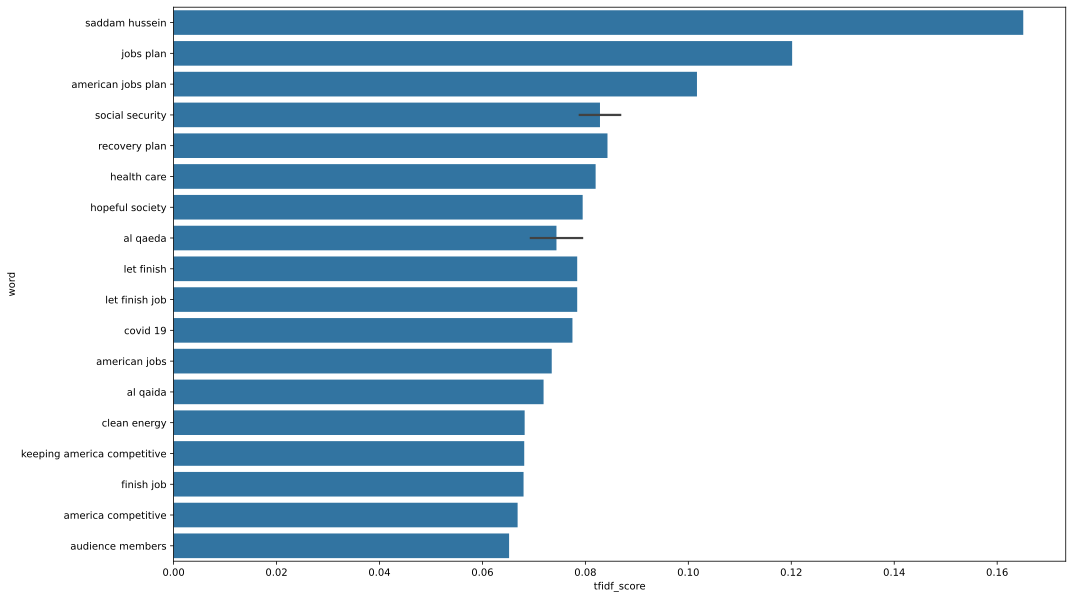

In [42]:
ax = sns.barplot(tfidf24_sub.head(20), x = "tfidf_score", y = "word")

for container, textname in zip(ax.containers, tfidf24_sub.textname):
    print(container, textname)
    #ax.bar_label(container, labels=[textname, textname])

# [Activity: Read in a different corpus, create a dataframe of info from this corpus, create a summary graphic, perform tfidf]